In [ ]:
# Install the required Packages for the Notebook
!pip install git+git://github.com/mkrphys/ipython-tikzmagic.git

In [2]:
%load_ext tikzmagic

In [ ]:
%%tikz -p tikzpeople -S people.png

\draw [help lines] (0,0) grid (10,6);

\node [alice, minimum size=1.5cm] (alice) at (1,2) {alice};

\node [person, minimum size=1.5cm, right=of alice] (person) {person};

\node [dave, minimum size=1.5cm, above=of alice] (dave) {dave};

\node [dave, saturated, mirrored, minimum size=1.5cm, above right=of alice] (dave2) {dave2};

\node [businessman, minimum size=1.5cm, right=of dave2, name=biz] {businessman};

\node [businessman, evil, female, good, mirrored, monitor, shield, sword, name=allop, minimum size=1.5cm, right=of biz] {all options};

\node [businessman, hair=gray, skin=pink, undershirt=blue, shirt=yellow, tie=red, minimum size=1.5cm, below=of biz, name=biz2] {w/colors};


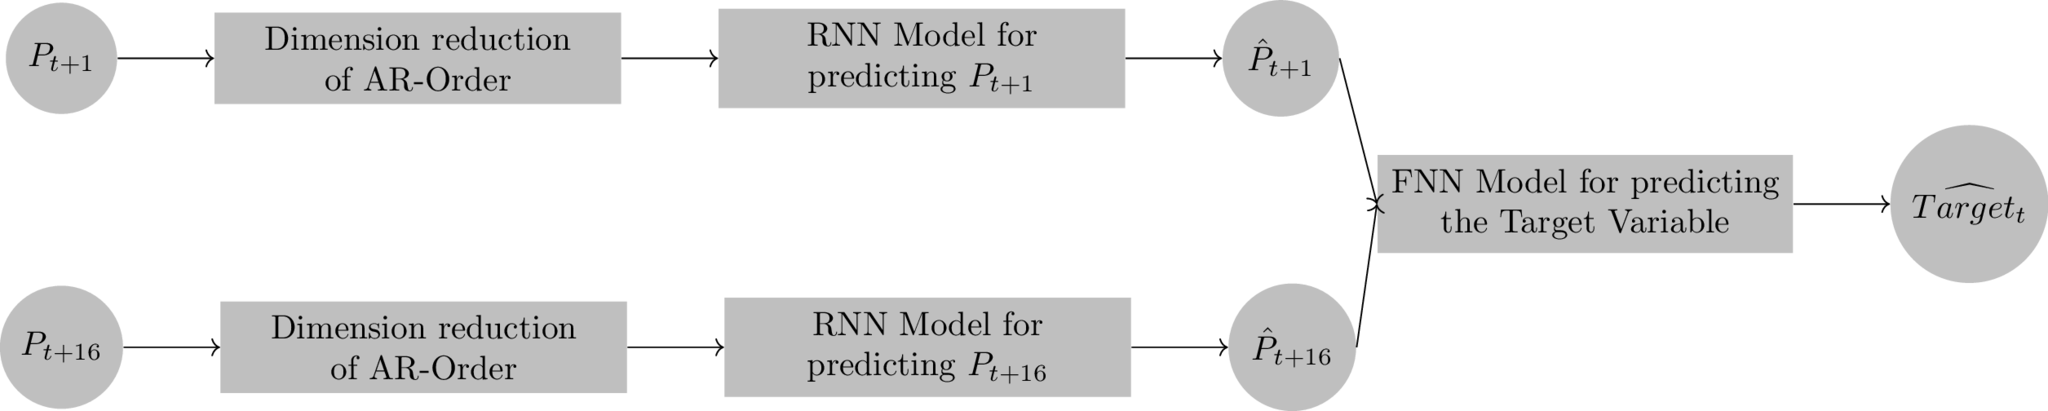

In [3]:
%%tikz -p tikzpeople -s 2048,1024 -S ARRNN.png


\tikzstyle{vertex}=[rectangle,fill=black!25,minimum size=24pt,inner sep=4pt]
\tikzstyle{input}=[circle,fill=black!25,minimum size=24pt,inner sep=4pt]

\node[input] (P1) at (1,4) {$P_{t+1}$};
\node[input] (P16) at (1, 1) {$P_{t+16}$};

\node[vertex, right=of P1, align=center, minimum width=120] (DimRed_P1) {Dimension reduction \\of AR-Order};
\node[vertex, right=of P16, align=center, minimum width=120] (DimRed_P16) {Dimension reduction \\of AR-Order};

\node[vertex, right=of DimRed_P1, align=center, minimum width=120] (RNN_P1) {RNN Model for \\predicting $P_{t+1}$};
\node[vertex, right=of DimRed_P16, align=center, minimum width=120] (RNN_P16) {RNN Model for \\predicting $P_{t+16}$};

\node[input, right=of RNN_P1] (P1_hat) {$\hat{P}_{t+1}$};
\node[input, right=of RNN_P16] (P16_hat) {$\hat{P}_{t+16}$};

\node[vertex, below right=0.8cm of P1_hat, align=center, minimum width=120] (FNN_Target) {FNN Model for predicting \\the Target Variable};

\node[input, right= of FNN_Target] (Target_hat) {$\widehat{Target_t}$};

\draw[->] (P1.east) -- (DimRed_P1.west);
\draw[->] (P16.east) -- (DimRed_P16.west);

\draw[->] (DimRed_P1.east) -- (RNN_P1.west);
\draw[->] (DimRed_P16.east) -- (RNN_P16.west);

\draw[->] (RNN_P1.east) -- (P1_hat.west);
\draw[->] (RNN_P16.east) -- (P16_hat.west);

\draw[->] (P1_hat.east) -- (FNN_Target.west);
\draw[->] (P16_hat.east) -- (FNN_Target.west);

\draw[->] (FNN_Target.east) -- (Target_hat.west);

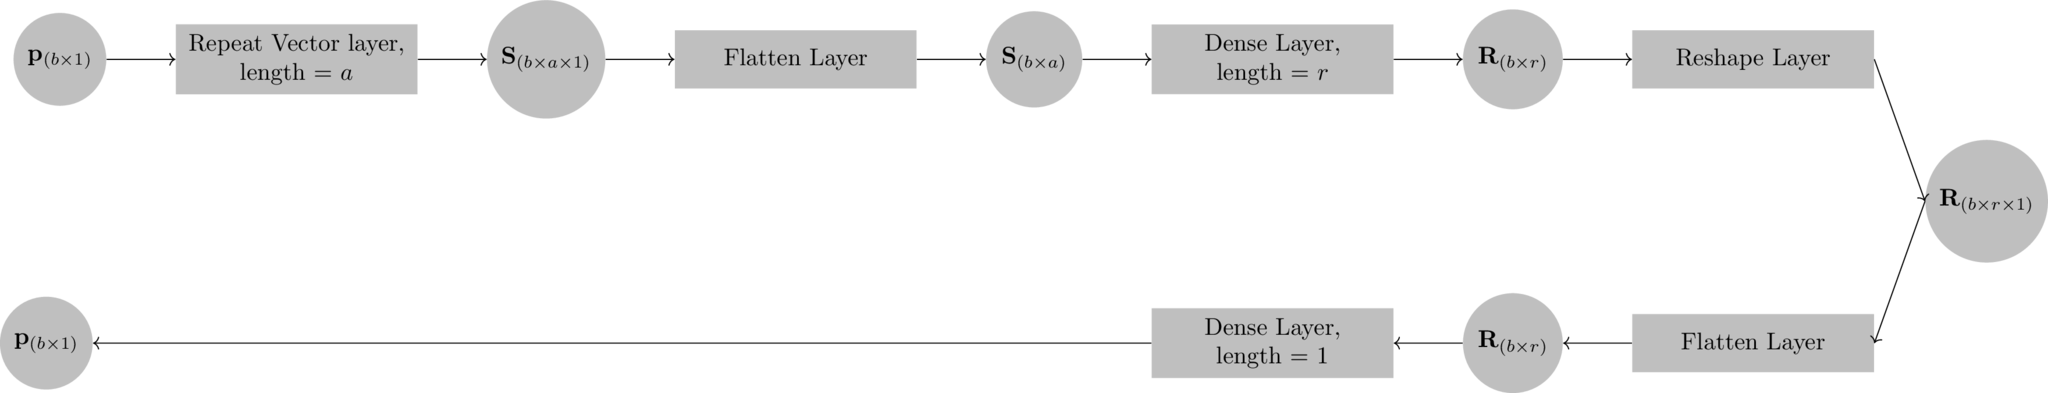

In [43]:
%%tikz -p tikzpeople -s 2048,1024 -S ARRNN_autoencoder.png


\tikzstyle{vertex}=[rectangle,fill=black!25,minimum size=24pt,inner sep=4pt]
\tikzstyle{input}=[circle,fill=black!25,minimum size=24pt,inner sep=4pt]

\node[input] (input_vec) at (1,4) {$\mathbf{p}_{(b \times 1)}$};

\node[vertex, right=of input_vec, align=center, minimum width=100] (repVec) {Repeat Vector layer, \\length = $a$};

\node[input, right=of repVec] (seq_matrix) {$\mathbf{S}_{(b \times a \times 1)}$};

\node[vertex, right=of seq_matrix, align=center, minimum width=100] (flatVec) {Flatten Layer};

\node[input, right=of flatVec] (fseq_matrix) {$\mathbf{S}_{(b \times a)}$};

\node[vertex, right=of fseq_matrix, align=center, minimum width=100] (densVec) {Dense Layer, \\length = $r$};

\node[input, right=of densVec] (redSeq_matrix) {$\mathbf{R}_{(b \times r)}$};

\node[vertex, right=of redSeq_matrix, align=center, minimum width=100] (reshapeMatrix) {Reshape Layer};


\node[input, below right=of reshapeMatrix] (redresSeq_matrix) {$\mathbf{R}_{(b \times r \times 1)}$};


\node[vertex, below left=of redresSeq_matrix, align=center, minimum width=100] (flattenMatrix2) {Flatten Layer};

\node[input, left=of flattenMatrix2] (redSeq_matrix2) {$\mathbf{R}_{(b \times r)}$};

\node[vertex, left=of redSeq_matrix2, align=center, minimum width=100] (densVec2) {Dense Layer, \\length = $1$};

\node[input, left=15.4cm of densVec2] (output_vec) {$\mathbf{p}_{(b \times 1)}$};


\draw[->] (input_vec.east) -- (repVec.west);
\draw[->] (repVec.east) -- (seq_matrix.west);
\draw[->] (seq_matrix.east) -- (flatVec.west);
\draw[->] (flatVec.east) -- (fseq_matrix.west);
\draw[->] (fseq_matrix.east) -- (densVec.west);
\draw[->] (densVec.east) -- (redSeq_matrix.west);
\draw[->] (redSeq_matrix.east) -- (reshapeMatrix.west);
\draw[->] (reshapeMatrix.east) -- (redresSeq_matrix.west);

\draw[->] (redresSeq_matrix.west) -- (flattenMatrix2.east);
\draw[->] (flattenMatrix2.west) -- (redSeq_matrix2.east);
\draw[->] (redSeq_matrix2.west) -- (densVec2.east);
\draw[->] (densVec2.west) -- (output_vec.east);

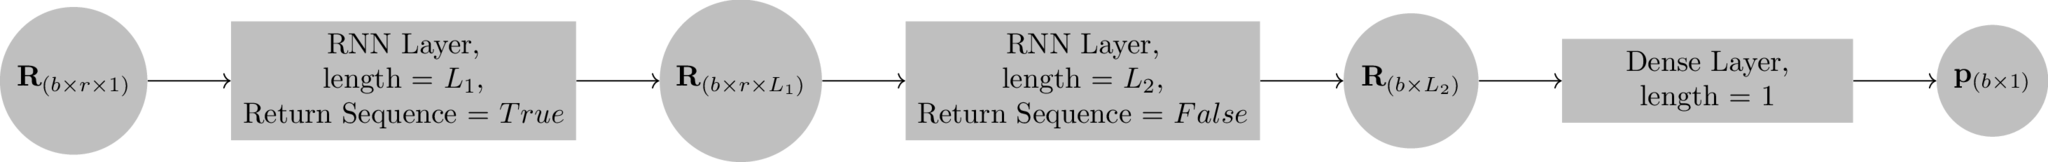

In [7]:
%%tikz -p tikzpeople -s 2048,1024 -S ARRNN_pricemodels.png


\tikzstyle{vertex}=[rectangle,fill=black!25,minimum size=24pt,inner sep=4pt]
\tikzstyle{input}=[circle,fill=black!25,minimum size=24pt,inner sep=4pt]

\node[input] (redSeqMatrix) at (1,4) {$\mathbf{R}_{(b \times r \times 1)}$};

\node[vertex, right=of redSeqMatrix, align=center, minimum width=100] (RNN1) {RNN Layer, \\length = $L_1$, \\Return Sequence = $True$};

\node[input, right=of RNN1] (L1_out_Matrix) {$\mathbf{R}_{(b \times r \times L_1)}$};

\node[vertex, right=of L1_out_Matrix, align=center, minimum width=100] (RNN2) {RNN Layer, \\length = $L_2$, \\Return Sequence = $False$};

\node[input, right=of RNN2] (L2_out_Matrix) {$\mathbf{R}_{(b \times L_2)}$};

\node[vertex, right=of L2_out_Matrix, align=center, minimum width=100] (Dense) {Dense Layer, \\length = $1$};

\node[input, right=of Dense] (out_Matrix) {$\mathbf{p}_{(b \times 1)}$};

\draw[->] (redSeqMatrix.east) -- (RNN1.west);
\draw[->] (RNN1.east) -- (L1_out_Matrix.west);
\draw[->] (L1_out_Matrix.east) -- (RNN2.west);
\draw[->] (RNN2.east) -- (L2_out_Matrix.west);
\draw[->] (L2_out_Matrix.east) -- (Dense.west);
\draw[->] (Dense.east) -- (out_Matrix.west);

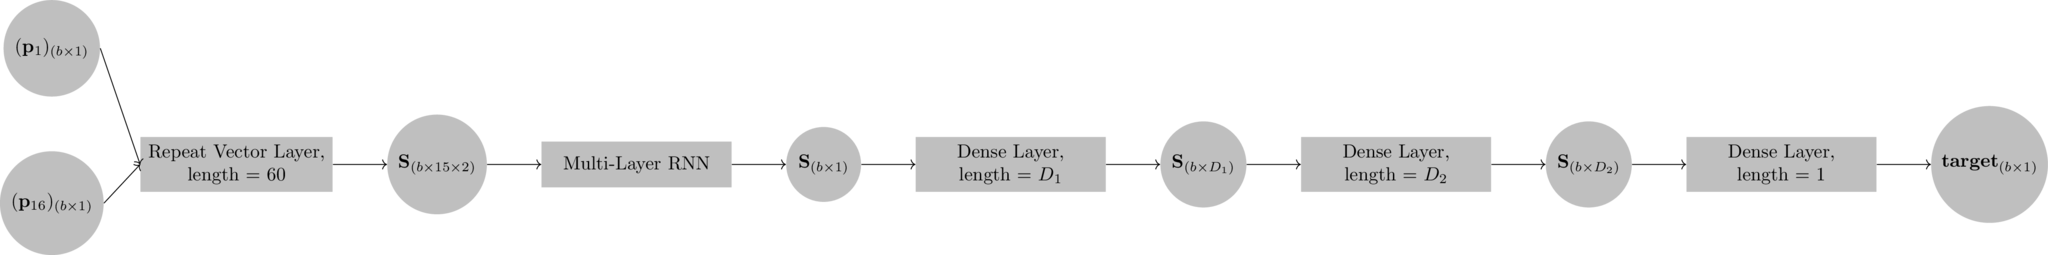

In [9]:
%%tikz -p tikzpeople -s 2048,1024 -S ARRNN_targetmodel.png

\tikzstyle{vertex}=[rectangle,fill=black!25,minimum size=24pt,inner sep=4pt]
\tikzstyle{input}=[circle,fill=black!25,minimum size=24pt,inner sep=4pt]

\node[input] (price1) at (1,4) {$(\mathbf{p}_1)_{(b \times 1)}$};

\node[input, below=of price1] (price16){$(\mathbf{p}_{16})_{(b \times 1)}$};

\node[vertex, below right=of price1, align=center, minimum width=100] (repVec) {Repeat Vector Layer, \\length = $60$};

\node[input, right=of repVec] (seqMatrix){$\mathbf{S}_{(b \times 15 \times 2)}$};

\node[vertex, right=of seqMatrix, align=center, minimum width=100] (multiRNN) {Multi-Layer RNN};


\node[input, right=of multiRNN] (win_price){$\mathbf{S}_{(b \times 1)}$};

\node[vertex, right=of win_price, align=center, minimum width=100] (dense1) {Dense Layer, \\length = $D_1$};

\node[input, right=of dense1] (outL1){$\mathbf{S}_{(b \times D_1)}$};

\node[vertex, right=of outL1, align=center, minimum width=100] (dense2) {Dense Layer, \\length = $D_2$};

\node[input, right=of dense2] (outL2){$\mathbf{S}_{(b \times D_2)}$};

\node[vertex, right=of outL2, align=center, minimum width=100] (dense3) {Dense Layer, \\length = $1$};

\node[input, right=of dense3] (outL3){$\mathbf{target}_{(b \times 1)}$};

\draw[->] (price1.east) -- (repVec.west);
\draw[->] (price16.east) -- (repVec.west);
\draw[->] (repVec.east) -- (seqMatrix.west);
\draw[->] (seqMatrix.east) -- (multiRNN.west);
\draw[->] (multiRNN.east) -- (win_price.west);
\draw[->] (win_price.east) -- (dense1.west);
\draw[->] (dense1.east) -- (outL1.west);
\draw[->] (outL1.east) -- (dense2.west);
\draw[->] (dense2.east) -- (outL2.west);
\draw[->] (outL2.east) -- (dense3.west);
\draw[->] (dense3.east) -- (outL3.west);